<a href="https://colab.research.google.com/github/DanhNguyen21/DanhNguyen21/blob/main/Nh%E1%BA%ADn_d%E1%BA%A1ng_4_lo%E1%BA%A1i_b%C3%A1nh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


In [2]:
url='/content/drive/MyDrive/bANH2'


In [3]:
generator= ImageDataGenerator(rescale=1./255,validation_split=0.1,rotation_range=0.1,width_shift_range=0.1,zoom_range=0.1)
train_data=generator.flow_from_directory(url,target_size=(150,150),batch_size=10,class_mode='categorical',subset='training')
validation_dataset=generator.flow_from_directory(url,target_size=(150,150),batch_size=10,class_mode='categorical',subset='validation')

Found 72 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) #size:32x32, 3 kenh mau
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 flatten (Flatten)           (None, 180000)            0         
                                                                 
 dense (Dense)               (None, 128)               23040128  
                                                        

In [5]:
opt=SGD(learning_rate=0.001,momentum=0.9)
model.compile (optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_data,epochs=15,batch_size=10,validation_data=validation_dataset,verbose=1)
score=model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là:',score[0])
print('Độ chính xác kiểm tra là:',score[1])

Epoch 1/15
8/8 [==============================] - 30s 4s/step - loss: 3.7939 - accuracy: 0.2361 - val_loss: 1.2806 - val_accuracy: 0.3750
Epoch 2/15
8/8 [==============================] - 6s 736ms/step - loss: 1.1879 - accuracy: 0.5000 - val_loss: 1.0383 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 6s 748ms/step - loss: 0.8725 - accuracy: 0.6389 - val_loss: 0.5760 - val_accuracy: 0.8750
Epoch 4/15
8/8 [==============================] - 6s 728ms/step - loss: 0.5620 - accuracy: 0.7639 - val_loss: 0.7089 - val_accuracy: 0.7500
Epoch 5/15
8/8 [==============================] - 6s 730ms/step - loss: 0.4060 - accuracy: 0.8472 - val_loss: 0.5744 - val_accuracy: 0.7500
Epoch 6/15
8/8 [==============================] - 6s 728ms/step - loss: 1.0674 - accuracy: 0.6111 - val_loss: 1.1504 - val_accuracy: 0.6250
Epoch 7/15
8/8 [==============================] - 6s 704ms/step - loss: 0.6360 - accuracy: 0.7639 - val_loss: 0.4009 - val_accuracy: 1.0000
Epoch 8/15
8/8 [======

In [6]:
validation_dataset.class_indices

{'Banhdalon': 0, 'Banhhoi': 1, 'Banhuot': 2, 'Banhxeo': 3}

In [7]:
name=['Banhdalon','Banhhoi','Banhuot','Banhxeo']

Banhxeo


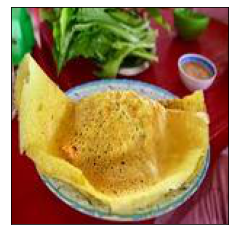

In [8]:
url='/content/xeo (2).jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])

Banhhoi


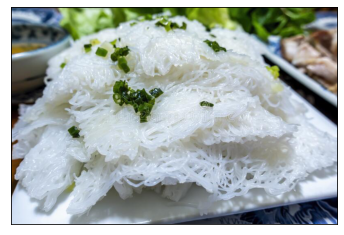

In [10]:
url='/content/traditional-vietnamese-rice-vermicelli-sheets-banh-hoi-question-cake-consist-thin-sheets-vermicelli-noodles-191944058.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])

Banhuot


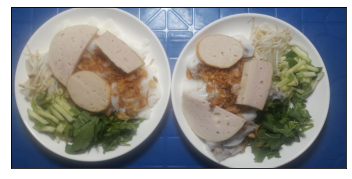

In [11]:
url='/content/bánh uot.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])

Banhdalon


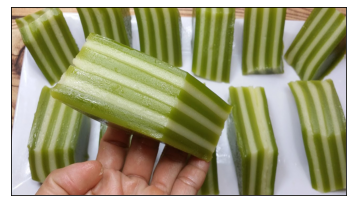

In [12]:
url='/content/banhdalon.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(load_img(url))
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255
print(name[np.argmax(model.predict(img))])